Task 7: **Customer Segmentation using Unsupervised Learning**

In [2]:
# Data handling ke liye
import pandas as pd
import numpy as np

# Visualization ke liye
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Warnings ko ignore karne ke liye
import warnings
warnings.filterwarnings("ignore")





In [3]:
# Google Drive ko mount karne ke liye
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
with open('Mall_Customers.csv') as f:
    for _ in range(5):
        print(f.readline())


CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)

0001,Male,19,15,39

0002,Male,21,15,81

0003,Female,20,16,6

0004,Female,23,16,77



In [12]:
from google.colab import files

uploaded = files.upload()

import pandas as pd

# ✅ Step 1: Read the CSV normally — don't use header=None
df = pd.read_csv('Mall_Customers.csv')

# ✅ Step 2: Clean column names
df.columns = df.columns.str.strip()

# ✅ Step 3: Rename 'Genre' to 'Gender' for clarity
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# ✅ Step 4: Check columns and preview
print(df.columns)
df.head()




Saving Mall_Customers.csv to Mall_Customers (4).csv
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


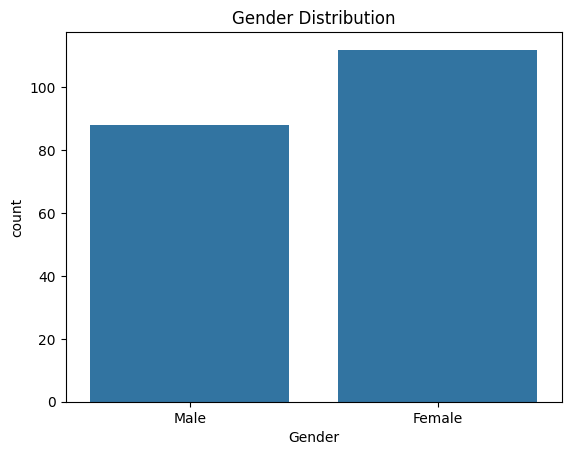

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


In [14]:
# Remove any unwanted spaces around column names
df.columns = df.columns.str.strip()


In [15]:
if 'Genre' in df.columns:
    df.rename(columns={'Genre': 'Gender'}, inplace=True)


In [16]:
print(df.columns)  # You should now see 'Gender'


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [17]:
# Dataset ka basic info
df.info()

# Missing values check karna
print(df.isnull().sum())

# Basic statistics dekhna
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:

# Show column names again
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


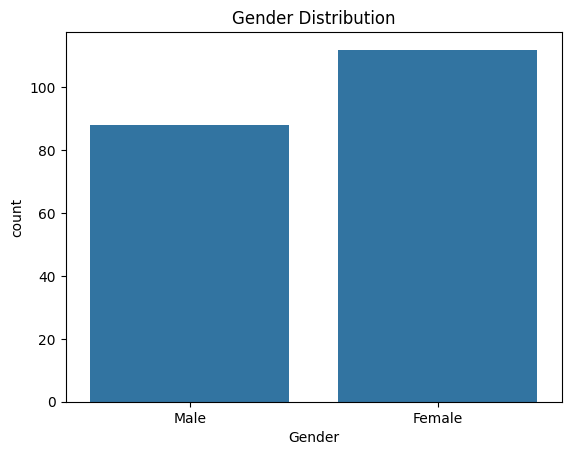

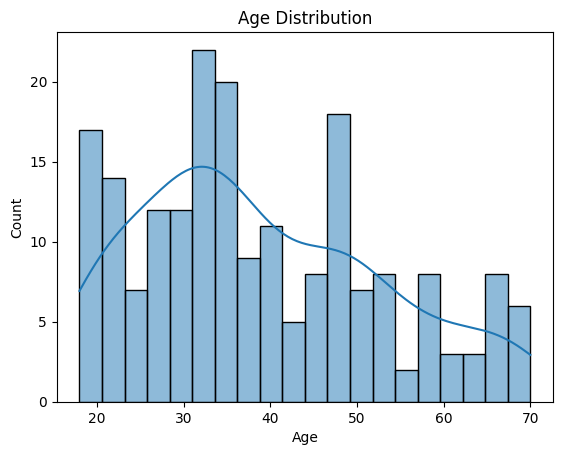

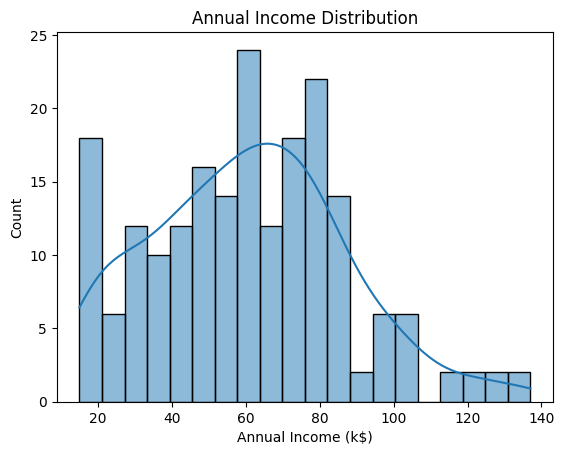

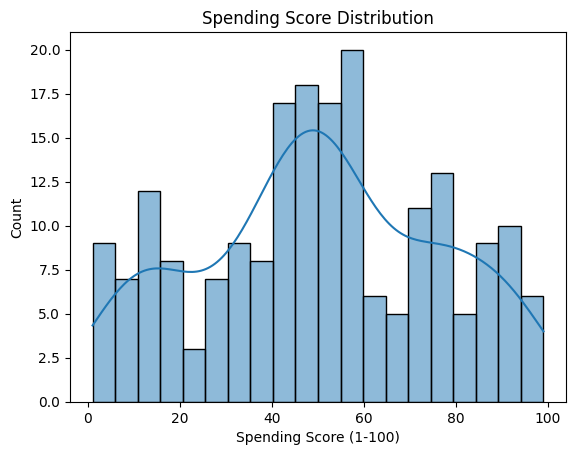

In [19]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Annual Income Distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.show()

# Spending Score Distribution
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.show()


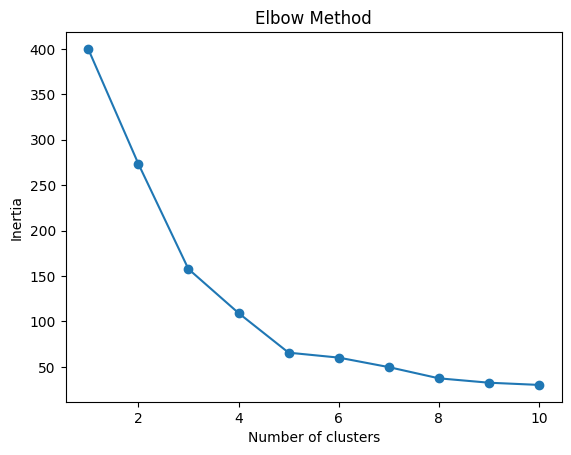

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: Scale the features (recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [21]:
# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check a few records
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


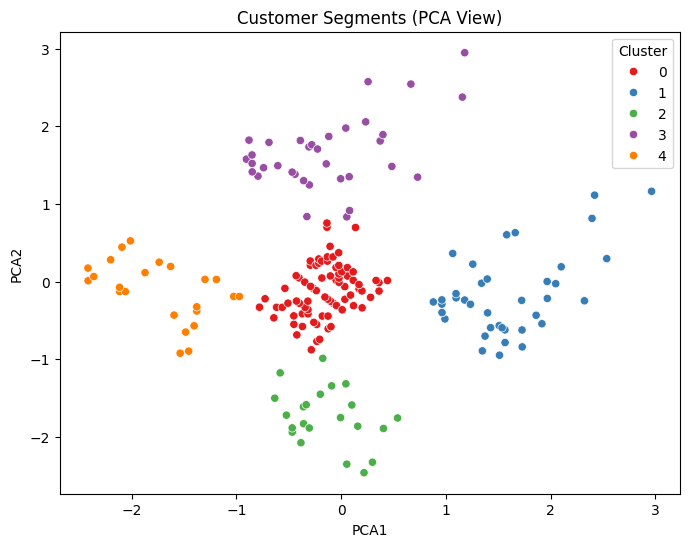

In [22]:
from sklearn.decomposition import PCA

# Reduce to 2D for plotting
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Add to DataFrame
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments (PCA View)')
plt.show()


In [23]:
for i in range(5):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} Summary:")
    print(cluster_data[['Annual Income (k$)', 'Spending Score (1-100)']].describe())


Cluster 0 Summary:
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%             54.000000               50.000000
75%             62.000000               55.000000
max             76.000000               61.000000
Cluster 1 Summary:
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
std             16.312485                9.364489
min             69.000000               63.000000
25%             75.500000               74.500000
50%             79.000000               83.000000
75%             95.000000               90.000000
max            137.000000               97.000000
Cluster 2 Summary:
       Annual Income (k$)  Spending Score (

In [24]:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.manifold import TSNE

# Initialize and fit t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add t-SNE results to DataFrame
df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]


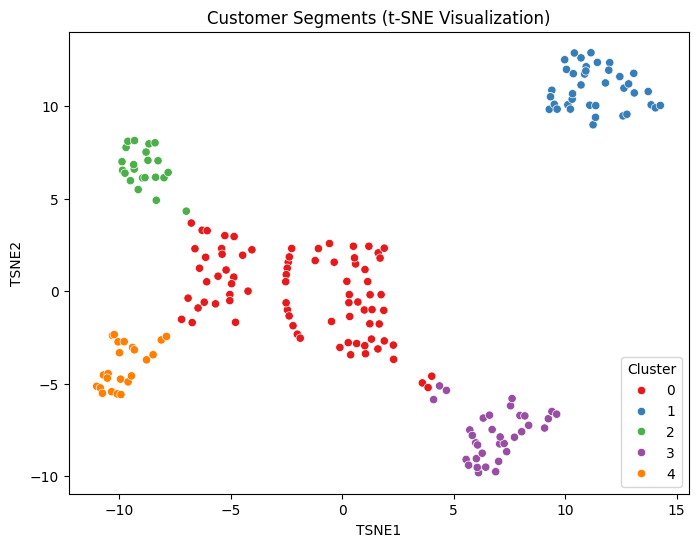

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments (t-SNE Visualization)')
plt.show()
